# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [2]:
!pip install --upgrade plotly
!pip install PySastrawi
!pip install nltk

     |████████████████████████████████| 13.2MB 272kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 215kB 7.8MB/s 


In [3]:
import plotly.express as px
import os
import pandas as pd
import re
import datetime as time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

# Data Preparation and Cleaning

## Data Preparation

In [4]:
# Read file by providing file path.
watsup_file = '/content/drive/My Drive/Tugas Analisis Data & Bisnis/Tugas P1/Final Report/EDA-BP-MSG-23520014-23520043.txt'

# Read WhatsApp file
if os.path.exists(watsup_file):
        file_data = open(watsup_file,'r', encoding="utf8")
        watsup_content = file_data.read()

# Get date
date_regex=re.compile(r'(\d+/\d+/\d+)')
date=date_regex.findall(watsup_content)

# Get time
time_regex=re.compile(r'(\d{1,2}:\d{2})')
time=time_regex.findall(watsup_content)

# Get Users
user_regex=re.compile(r'-(.*?):')
user=user_regex.findall(watsup_content)

# Get Message
message_regex=re.compile(r'([^:]+):?$')
me_regex=re.compile(r"(\n)(?<=)(\d+/\d+/\d+)(.*)")
mess=me_regex.findall(watsup_content)
message = [''.join(message_regex.findall(''.join(msg))).strip() for msg in mess]

# Zip date,time,user,message together
data=[]
for w,x,y,z in zip(date,time,user,message):
    data.append([str(w),str(x),str(y),str(z)])
    
# Create DataFrame from WhatsApp content
whatsapp_df=pd.DataFrame(data,columns=("Date","Time","User","Message"))

# Let's clean our Message
whatsapp_df['Message']=whatsapp_df['Message'].str.replace('\'(.*?): ','')

# Get Year from Date
whatsapp_df['Date'] = pd.to_datetime(whatsapp_df['Date'])
whatsapp_df['Year']= whatsapp_df['Date'].dt.year

# Get Weekday from Date
whatsapp_df['weekday'] = whatsapp_df['Date'].apply(lambda x: x.day_name())

# new column month_sent
whatsapp_df['month_sent'] = whatsapp_df['Date'].apply(lambda x: x.month_name()) 

# Get Month from Date
whatsapp_df['Month']=whatsapp_df['Date'].dt.month

# Get Day from Date
whatsapp_df['Day']=whatsapp_df['Date'].dt.day

# Get Hours of the Day

# whatsapp_df['Time'] = pd.to_datetime(whatsapp_df['Time'])
# whatsapp_df['Hours']=whatsapp_df.Time.apply(lambda x: x.hour)

# Message words
whatsapp_df['Words'] = whatsapp_df['Message'].str.strip().str.split('[\W_]+')

#column Letter_Count
whatsapp_df['Letter_Count'] = whatsapp_df['Message'].apply(lambda s : len(s))

#column Word_Count
whatsapp_df['Word_Count'] = whatsapp_df['Message'].apply(lambda s : len(s.split(' ')))

# Get Media shared in the Message
whatsapp_df['Media']=whatsapp_df['Message'].str.contains('<Media omitted>')

# Replace Username
whatsapp_df['User'] = whatsapp_df['User'].str.replace('Anggi Tri Rizki', 'User_1')
whatsapp_df['User'] = whatsapp_df['User'].str.replace('~', 'User_2')
whatsapp_df['User'] = whatsapp_df['User'].str.replace('Josua Crishan', 'User_3')

# Save the DataFrame to a csv file
whatsapp_df.to_csv("/content/drive/My Drive/Tugas Analisis Data & Bisnis/Tugas P1/Final Report/WhatsAppChatRCC.csv")

In [5]:
whatsapp_df

,Date,Time,User,Message,Year,weekday,month_sent,Month,Day,Words,Letter_Count,Word_Count,Media
0,2020-10-26,15:43,User_1,"43 - Anggi Tri Rizki created group ""FIB - Ruma...",2020,Monday,October,10,26,"[43, Anggi, Tri, Rizki, created, group, FIB, R...",61,12,False
1,2020-10-26,15:43,User_2,43 - Anggi Tri Rizki added you,2020,Monday,October,10,26,"[43, Anggi, Tri, Rizki, added, you]",30,7,False
2,2020-10-26,15:43,User_3,halooo,2020,Monday,October,10,26,[halooo],6,1,False
3,2020-10-26,15:43,User_1,Haloo,2020,Monday,October,10,26,[Haloo],5,1,False
4,2020-10-26,15:43,User_1,"kira"" kapan ada waktu kita diskusi awal dulu k...",2020,Monday,October,10,26,"[kira, kapan, ada, waktu, kita, diskusi, awal,...",53,11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,2021-03-21,21:48,User_3,udah semua yaa itu laporan sm ppt?,2021,Sunday,March,3,21,"[udah, semua, yaa, itu, laporan, sm, ppt, ]",34,7,False
1109,2021-03-21,22:33,User_1,aku upload ya?,2021,Sunday,March,3,21,"[aku, upload, ya, ]",14,3,False
1110,2021-03-21,22:33,User_1,oke mba,2021,Sunday,March,3,21,"[oke, mba]",7,2,False
1111,2021-03-21,22:33,User_3,<Media omitted>,2021,Sunday,March,3,21,"[, Media, omitted, ]",15,2,True


In [6]:
whatsapp_df.shape

(1113, 13)

In [7]:
whatsapp_df.describe

<bound method NDFrame.describe of            Date   Time     User  ... Letter_Count  Word_Count  Media
0    2020-10-26  15:43   User_1  ...           61          12  False
1    2020-10-26  15:43   User_2  ...           30           7  False
2    2020-10-26  15:43   User_3  ...            6           1  False
3    2020-10-26  15:43   User_1  ...            5           1  False
4    2020-10-26  15:43   User_1  ...           53          11  False
...         ...    ...      ...  ...          ...         ...    ...
1108 2021-03-21  21:48   User_3  ...           34           7  False
1109 2021-03-21  22:33   User_1  ...           14           3  False
1110 2021-03-21  22:33   User_1  ...            7           2  False
1111 2021-03-21  22:33   User_3  ...           15           2   True
1112 2021-03-21  22:37   User_2  ...           10           1  False

[1113 rows x 13 columns]>

In [8]:
whatsapp_df.columns

Index(['Date', 'Time', 'User', 'Message', 'Year', 'weekday', 'month_sent',
       'Month', 'Day', 'Words', 'Letter_Count', 'Word_Count', 'Media'],
      dtype='object')

## Data Cleaning

In [9]:
# To understand the number od the image data
img = whatsapp_df[whatsapp_df['Message'] == "<Media omitted>" ]
img.shape

(42, 13)

In [10]:
# We will drop all the image file by using the Drop functions
whatsapp_df.drop(img.index, inplace=True)

In [11]:
whatsapp_df

,Date,Time,User,Message,Year,weekday,month_sent,Month,Day,Words,Letter_Count,Word_Count,Media
0,2020-10-26,15:43,User_1,"43 - Anggi Tri Rizki created group ""FIB - Ruma...",2020,Monday,October,10,26,"[43, Anggi, Tri, Rizki, created, group, FIB, R...",61,12,False
1,2020-10-26,15:43,User_2,43 - Anggi Tri Rizki added you,2020,Monday,October,10,26,"[43, Anggi, Tri, Rizki, added, you]",30,7,False
2,2020-10-26,15:43,User_3,halooo,2020,Monday,October,10,26,[halooo],6,1,False
3,2020-10-26,15:43,User_1,Haloo,2020,Monday,October,10,26,[Haloo],5,1,False
4,2020-10-26,15:43,User_1,"kira"" kapan ada waktu kita diskusi awal dulu k...",2020,Monday,October,10,26,"[kira, kapan, ada, waktu, kita, diskusi, awal,...",53,11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,2021-03-21,21:32,User_1,oke makasih banyak mba,2021,Sunday,March,3,21,"[oke, makasih, banyak, mba]",22,4,False
1108,2021-03-21,21:48,User_3,udah semua yaa itu laporan sm ppt?,2021,Sunday,March,3,21,"[udah, semua, yaa, itu, laporan, sm, ppt, ]",34,7,False
1109,2021-03-21,22:33,User_1,aku upload ya?,2021,Sunday,March,3,21,"[aku, upload, ya, ]",14,3,False
1110,2021-03-21,22:33,User_1,oke mba,2021,Sunday,March,3,21,"[oke, mba]",7,2,False


In [12]:
whatsapp_df.reset_index(inplace=True, drop=True)
whatsapp_df.shape

(1071, 13)

# Exploratory Data Analysis (EDA)

## EDA-01 (Rata-rata panjang pesan yang dikirimkan tiap Sender)

In [13]:
whatsapp_df1 = whatsapp_df.copy()
whatsapp_df1 = whatsapp_df1[['User', 'Letter_Count']]
avg_letter_count_df = whatsapp_df1.groupby('User').mean()
avg_letter_count_df = avg_letter_count_df.rename(columns={"Letter_Count": "Avg Letter Count"})
avg_letter_count_df

,Avg Letter Count
User,
User_1,33.252451
User_2,33.983683
User_3,34.384615


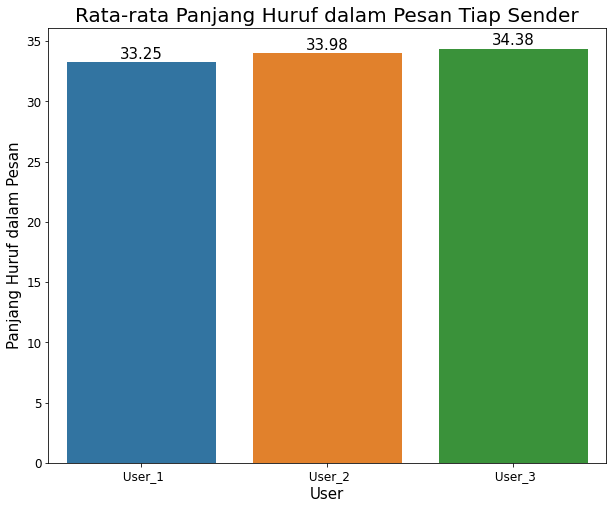

In [14]:
# Defining the plot size
plt.figure(figsize=(10, 8))

# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="User", y="Avg Letter Count", data=avg_letter_count_df.reset_index())

# Iterrating over the bars one-by-one
for bar in plots.patches:
	
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
	plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

plt.xlabel('User', fontsize = 15)
plt.ylabel('Panjang Huruf dalam Pesan', fontsize = 15)
plt.title("Rata-rata Panjang Huruf dalam Pesan Tiap Sender", fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


plt.show()

## EDA-02 (Rata-Rata Pesan yang dikirimkan Sender (Word Count))

In [15]:
whatsapp_df2 = whatsapp_df.copy()
average_message = whatsapp_df2[['User','Word_Count']]
average_message = average_message.fillna(0)
pt = average_message.pivot_table(index= 'User', values='Word_Count', aggfunc=np.average)
pt = pt.rename(columns={"Word_Count": "Avg Word Count"})
pt

,Avg Word Count
User,
User_1,6.051471
User_2,6.069930
User_3,6.273504


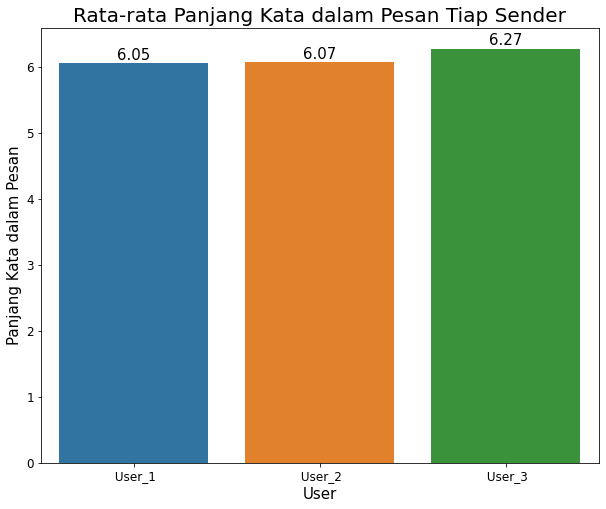

In [16]:
# Defining the plot size
plt.figure(figsize=(10, 8))

# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="User", y="Avg Word Count", data=pt.reset_index())

# Iterrating over the bars one-by-one
for bar in plots.patches:
	
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
	plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

plt.xlabel('User', fontsize = 15)
plt.ylabel('Panjang Kata dalam Pesan', fontsize = 15)
plt.title("Rata-rata Panjang Kata dalam Pesan Tiap Sender", fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


plt.show()

## EDA-03 (Analisis Hubungan Jumlah Pesan Tiap User Yang Dikirimkan Harian Setiap Jamnya)

In [17]:
whatsapp_df3 = whatsapp_df.copy()
whatsapp_df3['Datetime'] = whatsapp_df3['Date'].dt.strftime('%Y-%m-%d')   + ' ' + whatsapp_df3['Time']
whatsapp_df3['Datetime'] = pd.to_datetime(whatsapp_df3['Datetime'])
whatsapp_df3 = whatsapp_df3[['Datetime', 'User']]

df_msg_user_1 = whatsapp_df3[whatsapp_df3['User'] == ' User_1']
df_msg_user_2 = whatsapp_df3[whatsapp_df3['User'] == ' User_2']
df_msg_user_3 = whatsapp_df3[whatsapp_df3['User'] == ' User_3']

freq_user_1 = df_msg_user_1.groupby(pd.Grouper(key='Datetime',freq='H')).count()
freq_user_2 = df_msg_user_2.groupby(pd.Grouper(key='Datetime',freq='H')).count()
freq_user_3 = df_msg_user_3.groupby(pd.Grouper(key='Datetime',freq='H')).count()

freq_all = pd.concat([freq_user_1.rename(columns={"User": "user_1_msg_count"}), freq_user_2.rename(columns={"User": "user_2_msg_count"}), freq_user_3.rename(columns={"User": "user_3_msg_count"})], axis=1, )
freq_all.fillna(0, inplace=True)
freq_all = freq_all.astype(int)
freq_all

,user_1_msg_count,user_2_msg_count,user_3_msg_count
Datetime,,,
2020-10-26 15:00:00,8,5,4
2020-10-26 16:00:00,0,1,0
2020-10-26 17:00:00,0,0,0
2020-10-26 18:00:00,0,0,0
2020-10-26 19:00:00,0,0,0
...,...,...,...
2021-03-21 18:00:00,0,0,0
2021-03-21 19:00:00,6,12,2
2021-03-21 20:00:00,11,9,1


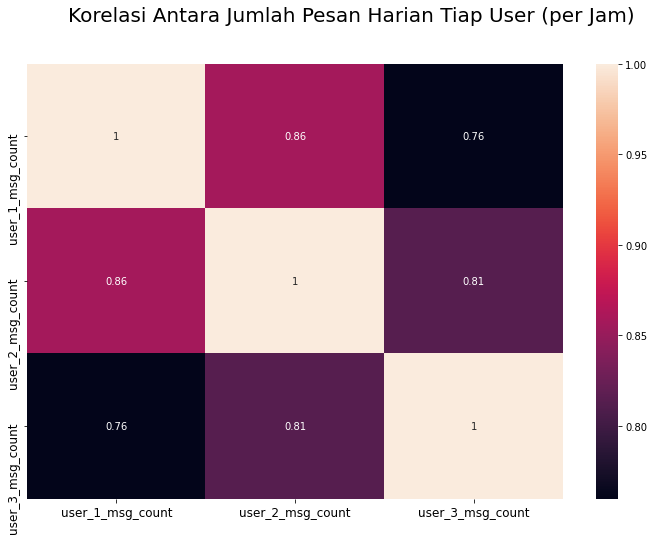

In [18]:
fig = plt.figure(figsize=(12, 8))

fig.suptitle("Korelasi Antara Jumlah Pesan Harian Tiap User (per Jam)", fontsize= 20)
sns.heatmap(freq_all.corr(), annot=True)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

## EDA-04 (Waktu Paling Aktif)

In [19]:
#Copy a dataframe
whatsapp_df10 = whatsapp_df.copy()

whatsapp_df10['number_of_message'] = [1] * whatsapp_df10.shape[0]

whatsapp_df10['DateTime'] = whatsapp_df10['Date'].astype(str) + ' ' + whatsapp_df10['Time']
whatsapp_df10['DateTime'] = pd.to_datetime(whatsapp_df10['DateTime'])

whatsapp_df10['hours'] = whatsapp_df10['DateTime'].apply(lambda x: x.hour)

time_df = whatsapp_df10.groupby('hours').count().reset_index().sort_values(by = 'hours')

time_df

,hours,Date,Time,User,Message,Year,weekday,month_sent,Month,Day,Words,Letter_Count,Word_Count,Media,number_of_message,DateTime
0,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,8,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
4,9,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
5,10,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
6,11,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
7,12,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
8,13,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113
9,14,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


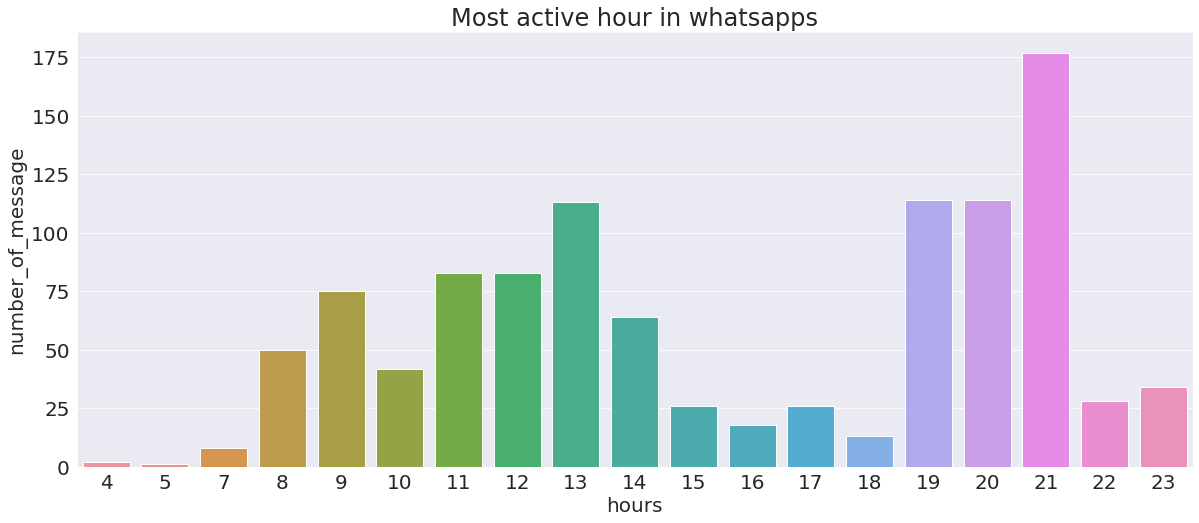

In [20]:
#Create the formatting of the graph 
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 8)

# Using the seaborn style 
sns.set_style("darkgrid")

plt.title('Most active hour in whatsapps');
sns.barplot(time_df.hours,time_df.number_of_message,data = time_df,dodge=False)

## EDA-05 (Jumlah Pesan per Hour of Day)

In [21]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

grouped_by_weekday_hour_df = freq_all.groupby([freq_all.index.dayofweek, freq_all.index.hour]).sum().sum(axis=1)
grouped_by_weekday_hour_df.index.rename(['Day of Week', 'Hour'], inplace=True)
grouped_by_weekday_hour_df = grouped_by_weekday_hour_df.reset_index(name='msg_count')
grouped_by_weekday_hour_df.sort_values(by=['Day of Week'], inplace=True, ascending=False)
grouped_by_weekday_hour_df['Day of Week'] = grouped_by_weekday_hour_df['Day of Week'].map(dayOfWeek)
grouped_by_weekday_hour_df

,Day of Week,Hour,msg_count
167,Sunday,23,30
155,Sunday,11,27
144,Sunday,0,0
145,Sunday,1,0
146,Sunday,2,0
...,...,...,...
20,Monday,20,0
21,Monday,21,0
22,Monday,22,0
23,Monday,23,0


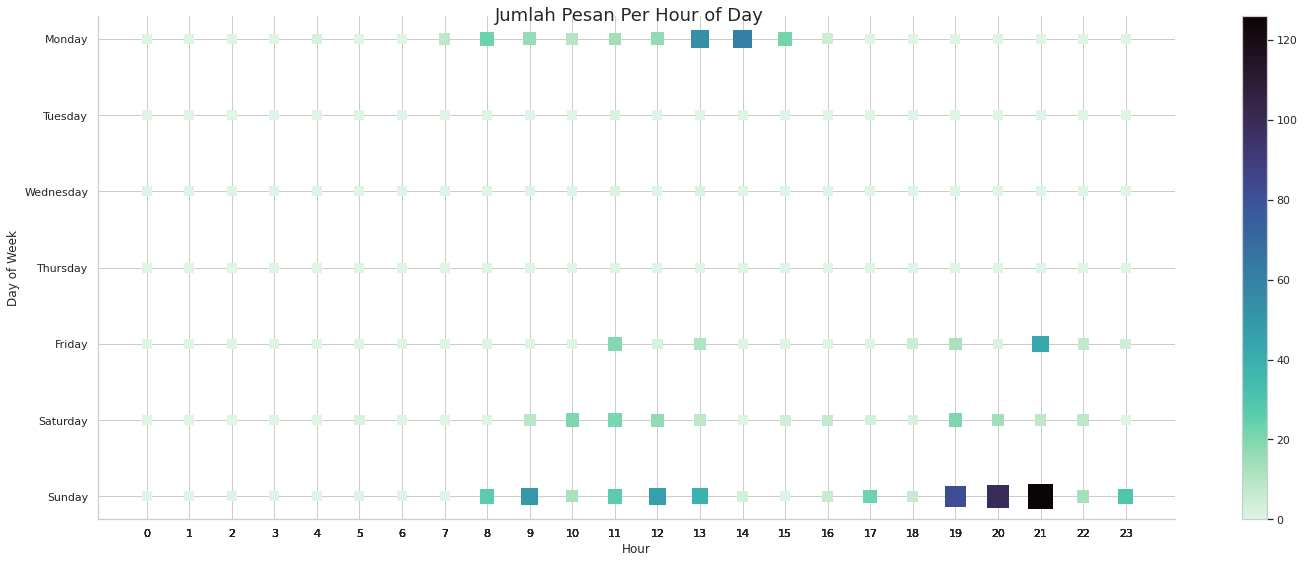

In [22]:
sns.set(style="whitegrid")

max_msg = grouped_by_weekday_hour_df['msg_count'].max()
min_msg = grouped_by_weekday_hour_df['msg_count'].min()

g = sns.relplot(x="Hour", y="Day of Week",
                hue="msg_count", size="msg_count",
                hue_norm=(min_msg, max_msg), size_norm=(min_msg, max_msg),
                palette="mako_r", sizes=(100, 600),
                marker="s", linewidth=0, legend=False,
                aspect=1.25, data=grouped_by_weekday_hour_df)
g.fig.set_size_inches(24,8)
g.fig.suptitle("Jumlah Pesan Per Hour of Day", fontsize= 18)
g.ax.invert_yaxis()
ghost = g.ax.scatter([], [], c=[], vmin=min_msg, vmax=max_msg, cmap="mako_r")
g.set(xticks=grouped_by_weekday_hour_df['Hour'])
g.fig.colorbar(ghost)


## EDA-06 (Jumlah Pesan per Day of Week)

In [23]:
custom_dict = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

whatsapp_df4 = whatsapp_df.copy()
temp = whatsapp_df4.groupby(['User', 'weekday'])['Message'].count().reset_index(name='count')
temp = temp.sort_values(by=['weekday'], key=lambda x: x.map(custom_dict))
temp

,User,weekday,count
1,User_1,Monday,98
6,User_2,Monday,82
11,User_3,Monday,52
4,User_1,Tuesday,1
9,User_2,Wednesday,2
0,User_1,Friday,48
5,User_2,Friday,39
10,User_3,Friday,17
2,User_1,Saturday,68
7,User_2,Saturday,45


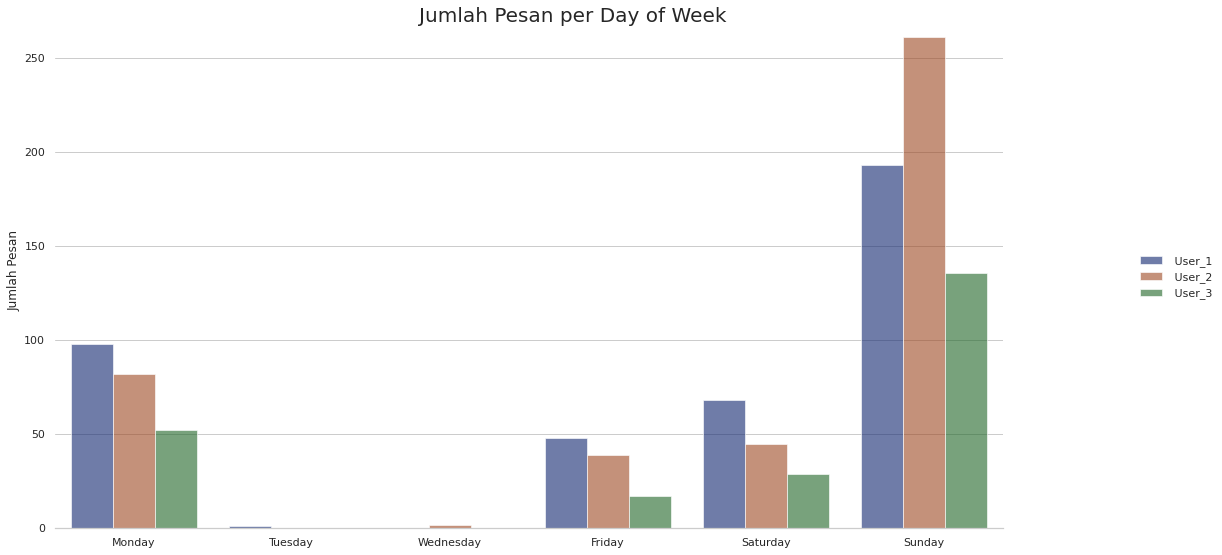

In [24]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=temp, kind="bar",
    x="weekday", y="count", hue="User",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.fig.set_size_inches(18,8)
g.fig.suptitle("Jumlah Pesan per Day of Week", fontsize= 20)
g.despine(left=True)
g.set_axis_labels("", "Jumlah Pesan")
g.legend.set_title("")

In [25]:
# fig = px.imshow(pt,labels=dict(x="Day of Week", y="Months", color="Count"))
# fig.update_layout(
#     width = 700, height = 700)
# fig.show()

## EDA-07 (Jumlah Pesan per Minggu Tiap Sender)

In [26]:
import math

whatsapp_df8 = whatsapp_df.copy()
whatsapp_df8['Number_of_messages'] = [1] * whatsapp_df8.shape[0]

whatsapp_df8['DateTime'] = whatsapp_df8['Date'].astype(str) + ' ' + whatsapp_df8['Time']
whatsapp_df8['DateTime'] = pd.to_datetime(whatsapp_df8['DateTime'])


whatsapp_df8['DateTimes'] = whatsapp_df8['Date'].astype(str) + ' ' + whatsapp_df8['Time']
whatsapp_df8['DateTimes'] = pd.to_datetime(whatsapp_df8['DateTimes'])

whatsapp_df8 = whatsapp_df8.set_index('DateTime')

whatsapp_df8['week'] = whatsapp_df8['DateTimes'].apply(lambda x: x.week)

def add_week_of_month(df):
    df['week_in_month'] = pd.to_numeric(df.index.day/7)
    df['week_in_month'] = df['week_in_month'].apply(lambda x: math.ceil(x))
    return df

whatsapp_df8.index = pd.to_datetime(whatsapp_df8.index)
whatsapp_df8 = add_week_of_month(whatsapp_df8)

custom_dict = {'January': 0, 
               'February': 1, 
               'March': 3, 
               'April': 4, 
               'May': 5, 
               'June': 6, 
               'July': 7, 
               'August': 8, 
               'September': 9, 
               'October': 10, 
               'November': 11, 
               'December': 12, '1': 13, '2': 14, '3': 15, '4': 16, '5': 17} 

df_week = whatsapp_df8.groupby(['week_in_month','month_sent'])['Number_of_messages'].count().sort_values(ascending = False).reset_index()
df_week = df_week.sort_values(by=['month_sent'], key=lambda x: x.map(custom_dict))
df_week

,week_in_month,month_sent,Number_of_messages
17,4,January,2
10,5,January,28
16,3,January,3
14,2,February,7
3,3,February,110
5,4,February,65
7,1,February,43
15,1,March,5
0,3,March,219
11,4,October,18


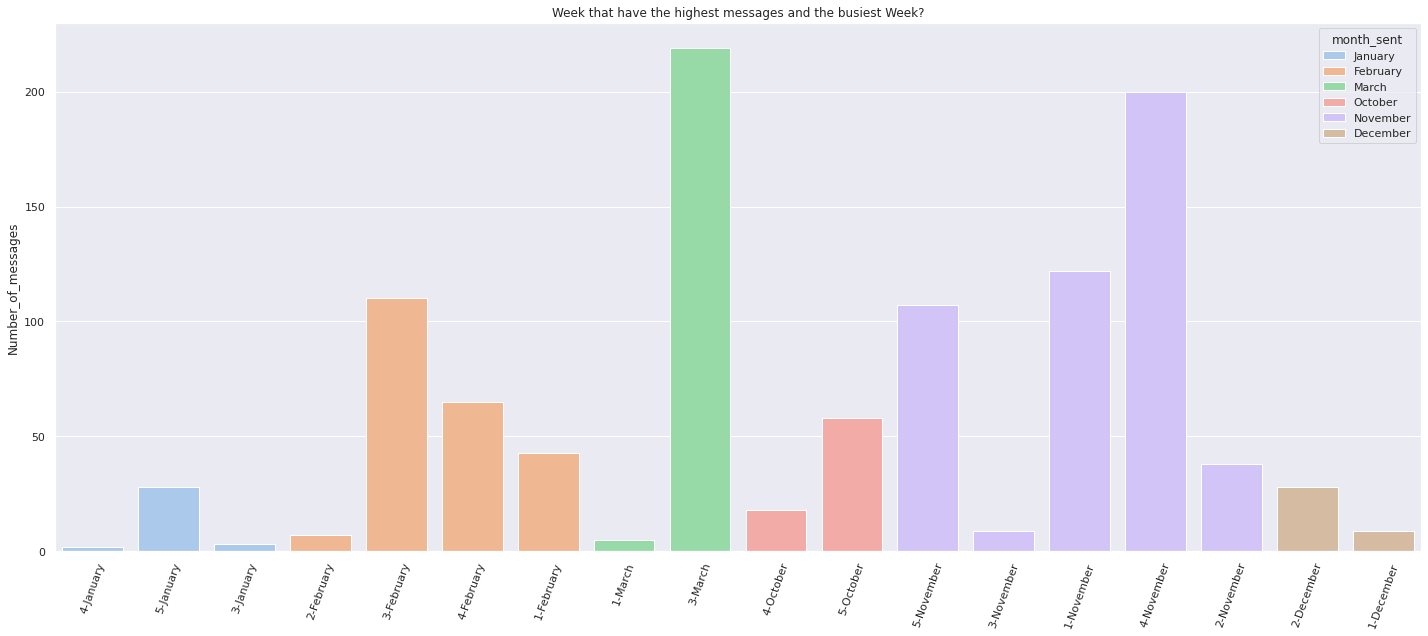

In [27]:
#Formating
sns.set_style("darkgrid")

#The background of the chart
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (20, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

months = []
for value in df_week.values.tolist():
  months.append(str(value[0])+'-'+value[1])
# print(months)

#Creating a bar chart
plt.title("Week that have the highest messages and the busiest Week?")
sns.barplot(x=months, y=df_week.Number_of_messages, hue = 'month_sent', data=df_week,dodge=False,palette="pastel")
plt.xticks(rotation=70)
plt.tight_layout()

## EDA-08 (Jumlah Pesan per Bulan Tiap Sender)

In [28]:
whatsapp_df9 = whatsapp_df.copy()
whatsapp_df9['Number_of_messages'] = [1] * whatsapp_df9.shape[0]

whatsapp_df9['DateTime'] = whatsapp_df9['Date'].astype(str) + ' ' + whatsapp_df9['Time']
whatsapp_df9['DateTime'] = pd.to_datetime(whatsapp_df9['DateTime'])

whatsapp_df9['month'] = whatsapp_df9['DateTime'].apply(lambda x: x.month)  

df_month = whatsapp_df9.groupby('month')['Number_of_messages'].count().sort_values(ascending = False).reset_index()
df_month

,month,Number_of_messages
0,11,476
1,2,225
2,3,224
3,10,76
4,12,37
5,1,33


Text(0.5, 1.0, 'Month that have the highest messages and the busiest month?')

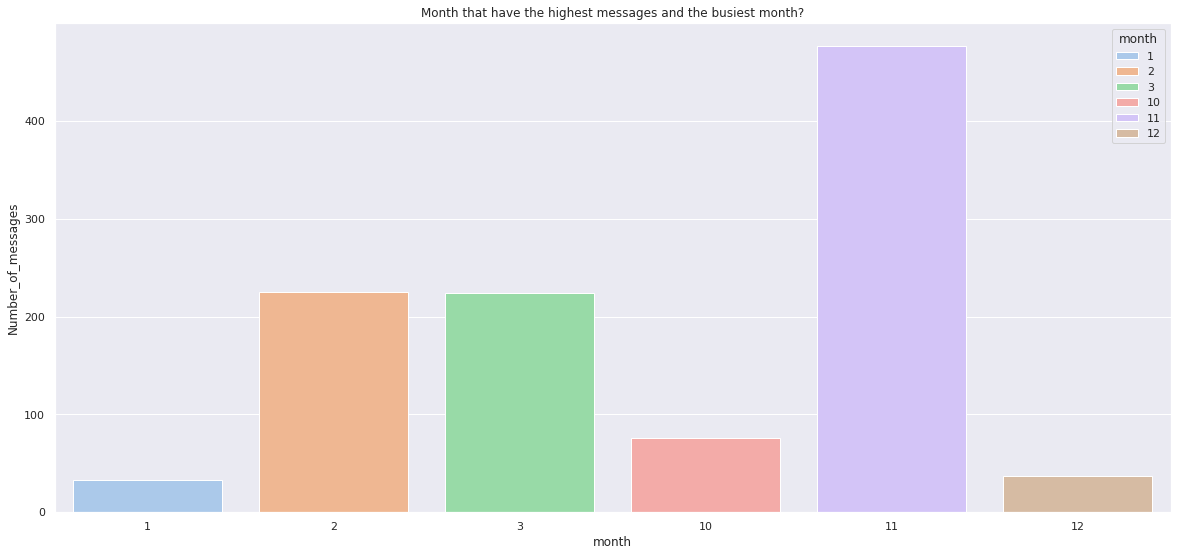

In [29]:
#Formating
sns.set_style("darkgrid")

#The background of the chart
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (20, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(x=df_month.month,y=df_month.Number_of_messages ,hue='month',data=df_month,dodge=False,palette="pastel")
plt.title("Month that have the highest messages and the busiest month?")

## EDA-09 (Jumlah Pesan Overall Per Sender)

In [30]:
#Creating a new dataframe by copying the old dataframe
whatsapp_df7 = whatsapp_df.copy()
whatsapp_df7['Number_of_messages'] = [1]* whatsapp_df7.shape[0]
whatsapp_df7.drop(columns = 'Date', inplace = True)

#We are groupby the user and messages together then we will use count() to count the messages for each of user
whatsapp_df7 = whatsapp_df7.groupby('User')['Number_of_messages'].count().sort_values(ascending = False).reset_index() 
whatsapp_df7

,User,Number_of_messages
0,User_2,429
1,User_1,408
2,User_3,234


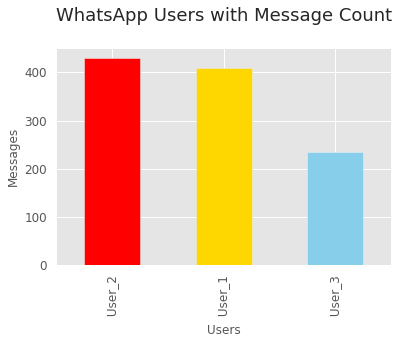

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
 
users=whatsapp_df.groupby('User')['User'].count().nlargest(15)
 
def bar_chart(users):
    ax = users.plot(kind='bar', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("WhatsApp Users with Message Count\n", fontsize=18)
    ax.set_xlabel("Users", fontsize=12)
    ax.set_ylabel("Messages", fontsize=12)
    plt.show()
    #plt.savefig('whatsapp.png')
 
bar_chart(users)

## EDA-10 (Kata-kata yang Sering Dikirimkan)

In [32]:
whatsapp_df6 = whatsapp_df.copy()
whatsapp_df6.head()

,Date,Time,User,Message,Year,weekday,month_sent,Month,Day,Words,Letter_Count,Word_Count,Media
0,2020-10-26,15:43,User_1,"43 - Anggi Tri Rizki created group ""FIB - Ruma...",2020,Monday,October,10,26,"[43, Anggi, Tri, Rizki, created, group, FIB, R...",61,12,False
1,2020-10-26,15:43,User_2,43 - Anggi Tri Rizki added you,2020,Monday,October,10,26,"[43, Anggi, Tri, Rizki, added, you]",30,7,False
2,2020-10-26,15:43,User_3,halooo,2020,Monday,October,10,26,[halooo],6,1,False
3,2020-10-26,15:43,User_1,Haloo,2020,Monday,October,10,26,[Haloo],5,1,False
4,2020-10-26,15:43,User_1,"kira"" kapan ada waktu kita diskusi awal dulu k...",2020,Monday,October,10,26,"[kira, kapan, ada, waktu, kita, diskusi, awal,...",53,11,False


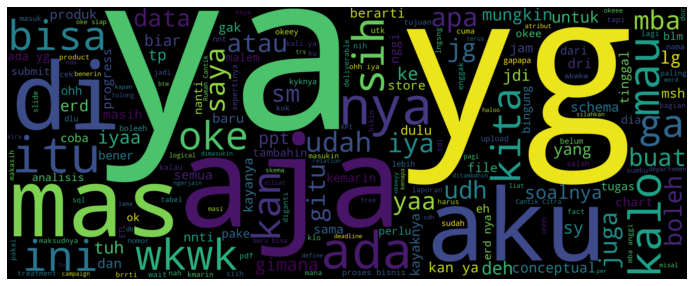

In [33]:
#Each of the word in the message will be review
word = " ".join(review for review in whatsapp_df6.Message)

stopwords = set(STOPWORDS)

#Creating a word cloud 
wordcloud = WordCloud(width = 2500, height =1000 ,stopwords=stopwords, background_color="black",min_font_size = 10).generate(word)

plt.figure(figsize=(18,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Bayesian Probability (BP)

In [34]:
sender_to_gender={' User_1':'F', ' User_2':'M', ' User_3':'M'}

whatsapp_df12 = whatsapp_df.copy()
whatsapp_df12['Gender'] = whatsapp_df12['User'].map(sender_to_gender)
whatsapp_df12 = whatsapp_df12[['Message', 'User', 'Gender']]
whatsapp_df12

,Message,User,Gender
0,"43 - Anggi Tri Rizki created group ""FIB - Ruma...",User_1,F
1,43 - Anggi Tri Rizki added you,User_2,M
2,halooo,User_3,M
3,Haloo,User_1,F
4,"kira"" kapan ada waktu kita diskusi awal dulu k...",User_1,F
...,...,...,...
1066,oke makasih banyak mba,User_1,F
1067,udah semua yaa itu laporan sm ppt?,User_3,M
1068,aku upload ya?,User_1,F
1069,oke mba,User_1,F


## Case Folding

In [35]:
# Mengubah text menjadi lowercase
kalimat = []
kalimat.clear()
for value in whatsapp_df12['Message']:
  output = value.lower()
  kalimat.append(output)
print(kalimat)

['43 - anggi tri rizki created group "fib - rumah cantik citra"', '43 - anggi tri rizki added you', 'halooo', 'haloo', 'kira" kapan ada waktu kita diskusi awal dulu kli ya 😅', 'boleehh', 'aku free trs siih kayanya', 'malem ini?', '//elib.unikom.ac.id/files/disk1/601/jbptunikompp-gdl-ofikperman-30011-11-unikom_o-i.pdf', 'mngkin ada yg ktemu struktur organisasi lain bisa dibandingin jg mana yg lebih baik dipake nnti', 'boleeh', 'boleh sy free juga', 'mau jam brapa?', 'jam 8 mungkin bisa', 'sy sdh buat teams juga, nnt meeting di ms teams aja', 'okaayy', 'boleh jam 8', 'temen2, ini deadlinenya senin besok ya berarti?', 'jadi setelah aku baca2, rcc tuh jualannya jasa spa (hand massage, face massage, body massage) + jasa konsultasi serta produk (lotion, scrub, body wash)', 'ini contoh banner produknya dpt dr google', 'berarti dihilangkan aja yg penjualan produknya ya', 'oh enggak mas, kan tetep ada jualan produk', 'misal setelah dikasih resep setelah konsultasi, pelanggan kan akan beli produ

In [36]:
# Menghapus Angka
x = 0
for value in kalimat:
  hasil = re.sub(r"\d+", "", value)
  kalimat[x] = hasil
  x += 1

print(kalimat)

[' - anggi tri rizki created group "fib - rumah cantik citra"', ' - anggi tri rizki added you', 'halooo', 'haloo', 'kira" kapan ada waktu kita diskusi awal dulu kli ya 😅', 'boleehh', 'aku free trs siih kayanya', 'malem ini?', '//elib.unikom.ac.id/files/disk//jbptunikompp-gdl-ofikperman---unikom_o-i.pdf', 'mngkin ada yg ktemu struktur organisasi lain bisa dibandingin jg mana yg lebih baik dipake nnti', 'boleeh', 'boleh sy free juga', 'mau jam brapa?', 'jam  mungkin bisa', 'sy sdh buat teams juga, nnt meeting di ms teams aja', 'okaayy', 'boleh jam ', 'temen, ini deadlinenya senin besok ya berarti?', 'jadi setelah aku baca, rcc tuh jualannya jasa spa (hand massage, face massage, body massage) + jasa konsultasi serta produk (lotion, scrub, body wash)', 'ini contoh banner produknya dpt dr google', 'berarti dihilangkan aja yg penjualan produknya ya', 'oh enggak mas, kan tetep ada jualan produk', 'misal setelah dikasih resep setelah konsultasi, pelanggan kan akan beli produk tsb', 'tapi kayak

In [37]:
# Menghapus Tanda Baca
# import string library function 
import string 
x = 0
for value in kalimat:
  hasil = value.translate(str.maketrans("","",string.punctuation))
  kalimat[x] = hasil
  x += 1

print(kalimat)

['  anggi tri rizki created group fib  rumah cantik citra', '  anggi tri rizki added you', 'halooo', 'haloo', 'kira kapan ada waktu kita diskusi awal dulu kli ya 😅', 'boleehh', 'aku free trs siih kayanya', 'malem ini', 'elibunikomacidfilesdiskjbptunikomppgdlofikpermanunikomoipdf', 'mngkin ada yg ktemu struktur organisasi lain bisa dibandingin jg mana yg lebih baik dipake nnti', 'boleeh', 'boleh sy free juga', 'mau jam brapa', 'jam  mungkin bisa', 'sy sdh buat teams juga nnt meeting di ms teams aja', 'okaayy', 'boleh jam ', 'temen ini deadlinenya senin besok ya berarti', 'jadi setelah aku baca rcc tuh jualannya jasa spa hand massage face massage body massage  jasa konsultasi serta produk lotion scrub body wash', 'ini contoh banner produknya dpt dr google', 'berarti dihilangkan aja yg penjualan produknya ya', 'oh enggak mas kan tetep ada jualan produk', 'misal setelah dikasih resep setelah konsultasi pelanggan kan akan beli produk tsb', 'tapi kayaknya orang yang mau beli bisa sekedar lan

In [38]:
# Menghapus whitepace (karakter kosong)
x = 0
for value in kalimat:
  hasil = value.strip()
  kalimat[x] = hasil
  x += 1

print(kalimat)

['anggi tri rizki created group fib  rumah cantik citra', 'anggi tri rizki added you', 'halooo', 'haloo', 'kira kapan ada waktu kita diskusi awal dulu kli ya 😅', 'boleehh', 'aku free trs siih kayanya', 'malem ini', 'elibunikomacidfilesdiskjbptunikomppgdlofikpermanunikomoipdf', 'mngkin ada yg ktemu struktur organisasi lain bisa dibandingin jg mana yg lebih baik dipake nnti', 'boleeh', 'boleh sy free juga', 'mau jam brapa', 'jam  mungkin bisa', 'sy sdh buat teams juga nnt meeting di ms teams aja', 'okaayy', 'boleh jam', 'temen ini deadlinenya senin besok ya berarti', 'jadi setelah aku baca rcc tuh jualannya jasa spa hand massage face massage body massage  jasa konsultasi serta produk lotion scrub body wash', 'ini contoh banner produknya dpt dr google', 'berarti dihilangkan aja yg penjualan produknya ya', 'oh enggak mas kan tetep ada jualan produk', 'misal setelah dikasih resep setelah konsultasi pelanggan kan akan beli produk tsb', 'tapi kayaknya orang yang mau beli bisa sekedar langsung

In [39]:
# Menghapus Emoji
def emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

x = 0
for value in kalimat:
  hasil = emoji(value)
  kalimat[x] = hasil
  x += 1

print(kalimat)

['anggi tri rizki created group fib  rumah cantik citra', 'anggi tri rizki added you', 'halooo', 'haloo', 'kira kapan ada waktu kita diskusi awal dulu kli ya ', 'boleehh', 'aku free trs siih kayanya', 'malem ini', 'elibunikomacidfilesdiskjbptunikomppgdlofikpermanunikomoipdf', 'mngkin ada yg ktemu struktur organisasi lain bisa dibandingin jg mana yg lebih baik dipake nnti', 'boleeh', 'boleh sy free juga', 'mau jam brapa', 'jam  mungkin bisa', 'sy sdh buat teams juga nnt meeting di ms teams aja', 'okaayy', 'boleh jam', 'temen ini deadlinenya senin besok ya berarti', 'jadi setelah aku baca rcc tuh jualannya jasa spa hand massage face massage body massage  jasa konsultasi serta produk lotion scrub body wash', 'ini contoh banner produknya dpt dr google', 'berarti dihilangkan aja yg penjualan produknya ya', 'oh enggak mas kan tetep ada jualan produk', 'misal setelah dikasih resep setelah konsultasi pelanggan kan akan beli produk tsb', 'tapi kayaknya orang yang mau beli bisa sekedar langsung 

## NLTK Function
Tokenization → Stemming → Lemmatization → Remove stopwords → Remove punctuation

In [40]:
p_stemmer = PorterStemmer()
def nltk_process(text):
    #Tokenization
    nltk_tokenList = word_tokenize(text)
    
    #Stemming
    nltk_stemedList = []
    for word in nltk_tokenList:
        nltk_stemedList.append(p_stemmer.stem(word))
    
    #Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    nltk_lemmaList = []
    for word in nltk_stemedList:
        nltk_lemmaList.append(wordnet_lemmatizer.lemmatize(word))
    
    # print("Stemming + Lemmatization")
    # print(nltk_lemmaList)    
    
    #Filter stopword
    filtered_sentence = []  
    nltk_stop_words = set(stopwords.words("indonesian"))
    for w in nltk_lemmaList:  
        if w not in nltk_stop_words:  
            filtered_sentence.append(w)    
    
    #Removing Punctuation
    punctuations="?:!.,;"
    for word in filtered_sentence:
        if word in punctuations:
            filtered_sentence.remove(word)
    # print(" ")
    # print("Remove stopword & Punctuation")
    return filtered_sentence

## NLTK Process

In [ ]:
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *

corpus = []
corpus.clear()
for value in kalimat:
  output = nltk_process(value)
  corpus.append(' '.join(output))
print(corpus)

In [ ]:
corpus = whatsapp_df12['Message'].to_list()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

## Modelling

### BP-01 (Klasifikasi Gender)

In [ ]:
y = whatsapp_df12['Gender'].to_list()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

In [ ]:
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))

### BP-02 (Klasifikasi Sender)

In [ ]:
y = whatsapp_df12['User'].to_list()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

In [ ]:
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print(metrics.classification_report(y_test, predicted))